In [23]:
import torch
import time

# init variable a, b as 1000 dimension vector
n = 1000
a = torch.ones(n)
b = torch.ones(n)

In [24]:
# define a timer class to record time
class Timer(object):
    """Record multiple running times."""
    def __init__(self):
        self.times = []
        self.start()

    def start(self):
        # start the timer
        self.start_time = time.time()

    def stop(self):
        # stop the timer and record time into a list
        self.times.append(time.time() - self.start_time)
        return self.times[-1]

    def avg(self):
        # calculate the average and return
        return sum(self.times)/len(self.times)

    def sum(self):
        # return the sum of recorded time
        return sum(self.times)

In [30]:
timer = Timer()
c = torch.zeros(n)#返回一个形状为为size,类型为torch.dtype，里面的每一个值都是0的tensor 一维的某个向量
for i in range(n):
    c[i] = a[i] + b[i]
#'%.5f sec' % timer.stop()
print('程序运行总耗时： %.5f sec' % timer.stop())#%还用在python的格式化输出

程序运行总耗时： 0.01951 sec


x=torch.zeros([2,5],dtype=torch.float)
x.stride()
		'''
		输出分别为：
		tensor([[0., 0., 0., 0., 0.],
		        [0., 0., 0., 0., 0.]])
		        
		(5, 1)  #注意看这里,要深刻理解这里为啥这个数值
		'''

y=x.t()
y.stride()
	'''
	输出分别为：
	
	tensor([[0., 0.],
	        [0., 0.],
	        [0., 0.],
	        [0., 0.],
	        [0., 0.]])
		
	(1, 5) #注意看这里
	'''
————————————————
版权声明：本文为CSDN博主「UESTC_20172222」的原创文章，遵循 CC 4.0 BY-SA 版权协议，转载请附上原文出处链接及本声明。
原文链接：https://blog.csdn.net/qq_32806793/article/details/102951466

In [26]:
timer.start()
d = a + b
'%.5f sec' % timer.stop()#print('程序运行总耗时： %.5f sec' %running_time)
#print('程序运行总耗时： %.5f sec' % timer.stop())

'0.00050 sec'

In [18]:
# import packages and modules
%matplotlib inline
import torch
from IPython import display
from matplotlib import pyplot as plt
import numpy as np
import random

print(torch.__version__)

1.3.1


In [8]:
# set input feature number 
num_inputs = 2
# set example number
num_examples = 1000

# set true weight and bias in order to generate corresponded label
true_w = [2, -3.4]
true_b = 4.2

features = torch.randn(num_examples, num_inputs,#生成自由数据 返回一个张量，从标准正态分布（均值为0，方差为1）中抽取的一组随机数。张量的形状由参数sizes定义。
                      dtype=torch.float32)
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b
labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()),#生成自由数据
                       dtype=torch.float32)

np.random.normal
参数loc(float)：正态分布的均值，对应着这个分布的中心。loc=0说明这一个以Y轴为对称轴的正态分布，
参数scale(float)：正态分布的标准差，对应分布的宽度，scale越大，正态分布的曲线越矮胖，scale越小，曲线越高瘦。
参数size(int 或者整数元组)：输出的值赋在shape里，默认为None

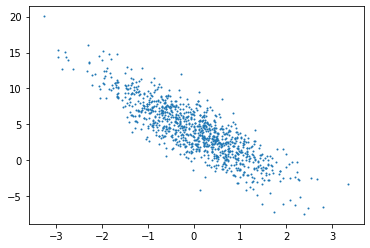

In [9]:
plt.scatter(features[:, 1].numpy(), labels.numpy(), 1);#散点图绘制  

In [12]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)  # random read 10 samples
    for i in range(0, num_examples, batch_size):
        j = torch.LongTensor(indices[i: min(i + batch_size, num_examples)]) # the last time may be not enough for a whole batch
        yield  features.index_select(0, j), labels.index_select(0, j)#返回函数

index (LongTensor) – 聚合元素的下标(index需要是torch.longTensor类型)
.index_select
第一个参数是索引的对象，
第二个参数0表示按行索引，1表示按列进行索引，
第三个参数是一个tensor，就是索引的序号，比如b里面tensor[0， 2]表示第0行和第2行，c里面tensor[1, 3]表示第1列和第3列。

In [32]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[-1.2718, -0.8848],
        [ 0.5395, -1.4735],
        [-0.6107,  0.2222],
        [-0.4558,  0.8513],
        [ 0.4740,  0.1070],
        [ 0.2287,  0.1061],
        [-0.7699, -0.5188],
        [-1.1558,  0.4784],
        [ 0.7361,  0.2717],
        [ 0.2005,  0.0083]]) 
 tensor([ 4.6497, 10.2809,  2.2505,  0.4043,  4.7740,  4.2967,  4.4278,  0.2553,
         4.7344,  4.5874])


初始化模型

In [34]:
w = torch.tensor(np.random.normal(0, 0.01, (num_inputs, 1)), dtype=torch.float32)
b = torch.zeros(1, dtype=torch.float32)

w.requires_grad_(requires_grad=True)
b.requires_grad_(requires_grad=True)

tensor([0.], requires_grad=True)

In [35]:
def linreg(X, w, b):
    return torch.mm(X, w) + b

In [36]:
def squared_loss(y_hat, y): 
    return (y_hat - y.view(y_hat.size())) ** 2 / 2

In [37]:
def sgd(params, lr, batch_size): 
    for param in params:
        param.data -= lr * param.grad / batch_size # ues .data to operate param without gradient track

In [38]:
# super parameters init 定义超参数
lr = 0.03
num_epochs = 5

net = linreg
loss = squared_loss

# training
for epoch in range(num_epochs):  # training repeats num_epochs times
    # in each epoch, all the samples in dataset will be used once
    
    # X is the feature and y is the label of a batch sample
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y).sum()  
        # calculate the gradient of batch sample loss 损失计算
        l.backward()  #.backward()的第一个参数，即是L关于y的梯度的值。 反向
        # using small batch random gradient descent to iter model parameters 反向传播
        sgd([w, b], lr, batch_size)  
        # reset parameter gradient 参数优化
        w.grad.data.zero_() # 梯度清零
        b.grad.data.zero_()
    train_l = loss(net(features, w, b), labels)
    print('epoch %d, loss %f' % (epoch + 1, train_l.mean().item()))

epoch 1, loss 0.044796
epoch 2, loss 0.000181
epoch 3, loss 0.000052
epoch 4, loss 0.000051
epoch 5, loss 0.000052


In [39]:
w, true_w, b, true_b




(tensor([[ 1.9996],
         [-3.4001]], requires_grad=True),
 [2, -3.4],
 tensor([4.2000], requires_grad=True),
 4.2)

pytouch实现

In [40]:
import torch
from torch import nn
import numpy as np
torch.manual_seed(1)

print(torch.__version__)
torch.set_default_tensor_type('torch.FloatTensor')

1.3.1


In [41]:

num_inputs = 2
num_examples = 1000

true_w = [2, -3.4]
true_b = 4.2

features = torch.tensor(np.random.normal(0, 1, (num_examples, num_inputs)), dtype=torch.float)
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b
labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()), dtype=torch.float)

读取数据集

In [42]:
import torch.utils.data as Data

batch_size = 10

# combine featues and labels of dataset 数据集和标签组合起来
dataset = Data.TensorDataset(features, labels)

# put dataset into DataLoader 从数据集取数据
data_iter = Data.DataLoader(
    dataset=dataset,            # torch TensorDataset format 数据集
    batch_size=batch_size,      # mini batch size 小批量大小
    shuffle=True,               # whether shuffle the data or not 是否随机取出
    num_workers=2,              # read data in multithreading 工作线程
)

In [43]:
for X, y in data_iter: # 数据读取
    print(X, '\n', y)
    break

tensor([[ 0.8376,  0.8811],
        [-2.5228,  0.5592],
        [-0.6123,  0.5901],
        [ 1.2547, -1.0813],
        [-0.6619,  0.2890],
        [ 0.7865,  0.4277],
        [ 0.2615, -1.6779],
        [-0.1444, -0.9623],
        [ 0.2140,  0.6331],
        [-0.2348,  0.2467]]) 
 tensor([ 2.8838, -2.7379,  0.9706, 10.3711,  1.8868,  4.3109, 10.4413,  7.1687,
         2.4624,  2.8951])


模型定义

In [44]:
class LinearNet(nn.Module):
    def __init__(self, n_feature):
        super(LinearNet, self).__init__()      # call father function to init  固定搭配？
        self.linear = nn.Linear(n_feature, 1)  # function prototype: `torch.nn.Linear(in_features, out_features, bias=True)`

    def forward(self, x):   #前向传播 线性
        y = self.linear(x)
        return y
    
net = LinearNet(num_inputs)       #实例化
print(net)

LinearNet(
  (linear): Linear(in_features=2, out_features=1, bias=True)
)


In [45]:
# ways to init a multilayer network 神经网络初始化方法
# method one
net = nn.Sequential(
    nn.Linear(num_inputs, 1)
    # other layers can be added here
    )

# method two
net = nn.Sequential()
net.add_module('linear', nn.Linear(num_inputs, 1))
# net.add_module ......

# method three
from collections import OrderedDict
net = nn.Sequential(OrderedDict([
          ('linear', nn.Linear(num_inputs, 1))
          # ......
        ]))

print(net)
print(net[0])


Sequential(
  (linear): Linear(in_features=2, out_features=1, bias=True)
)
Linear(in_features=2, out_features=1, bias=True)


#初始化模型函数

In [46]:
from torch.nn import init

init.normal_(net[0].weight, mean=0.0, std=0.01)
init.constant_(net[0].bias, val=0.0)  # or you can use `net[0].bias.data.fill_(0)` to modify it directly

Parameter containing:
tensor([0.], requires_grad=True)

In [47]:
for param in net.parameters():
    print(param)

Parameter containing:
tensor([[-0.0142, -0.0161]], requires_grad=True)
Parameter containing:
tensor([0.], requires_grad=True)


定义损失函数

In [48]:
loss = nn.MSELoss()    # nn built-in squared loss function 均方误差损失函数
                       # function prototype: `torch.nn.MSELoss(size_average=None, reduce=None, reduction='mean')`

定义优化函数

In [49]:
import torch.optim as optim

optimizer = optim.SGD(net.parameters(), lr=0.03)   # built-in random gradient descent function 建立随机梯度下降
print(optimizer)  # function prototype: `torch.optim.SGD(params, lr=, momentum=0, dampening=0, weight_decay=0, nesterov=False)`
# 输出定义的优化函数


SGD (
Parameter Group 0
    dampening: 0
    lr: 0.03
    momentum: 0
    nesterov: False
    weight_decay: 0
)


训练

In [50]:
num_epochs = 3#训练周期
for epoch in range(1, num_epochs + 1):#训练周期循环
    for X, y in data_iter:#取数据循环
        output = net(X)#将输入x放入网络中 输出为预测的y
        l = loss(output, y.view(-1, 1))#将预测的y与标签放入损失函数 损失计算
        optimizer.zero_grad() # reset gradient, equal to net.zero_grad() 梯度清零 防止累加
        l.backward()#反向传播 计算梯度
        optimizer.step()#优化函数 迭代优化
    print('epoch %d, loss: %f' % (epoch, l.item())) #每个周期输出

epoch 1, loss: 0.000319
epoch 2, loss: 0.000066
epoch 3, loss: 0.000053


In [51]:
# result comparision 结果比较
dense = net[0]
print(true_w, dense.weight.data)
print(true_b, dense.bias.data)

[2, -3.4] tensor([[ 1.9999, -3.3994]])
4.2 tensor([4.1999])
